CapStone Project 3 - Retail

Problem Statement

•	It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
•	Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
•	Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).
Dataset Description
This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import skewnorm
import scipy.stats as stats  
from sklearn.preprocessing import LabelEncoder
import pylab as p  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [213]:
df=pd.read_excel(r'D:\OneDrive\Studies\AI - ML\Capstone Project\OnlineRetail.xlsx',sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
2,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
3,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom


Project Task: Week 1
Data Cleaning:
1. Perform a preliminary data inspection and data cleaning.


8 columns are available. 
The item related are - Stock Code (Quantifible), & Description
Sale Realted are - Invoice number and Invoice Date & Quantity & Unit Price
Customer Realted are - Customer Id & Country

The main or basic inferred data are - Spending pattern, Spending categories, Customer Spending Behaviour 

a. Check for missing data and formulate an apt strategy to treat them.

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
2,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
3,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
541905,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom
541906,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Column - Description, & CustomerID,  have some Null Values in them

Description Column is No Value add so there is no problem in dropping it. 
Since Customer Id is the main identifying element, Unique Identifying Entity, it's absence would be difficult to fill through
Unlike cost or Sale Unit, where we could use average, we cannot use any other means to treat this except deletion. 

Identifying & Removing Null Values. Starting from the column that has max null values. 
If it clears the null values in other columns, we would not need to repeat the activity with other columns

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.dropna(subset=['CustomerID'], inplace=True)

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

b. Identify & Remove duplicate data records.

In [9]:
# occurrence based on all columns
duplicate = df[df.duplicated(subset=None, keep='first')]
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
44,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029.0,United Kingdom
349,C570556,22568,FELTCRAFT CUSHION OWL,-144,2011-10-11 11:10:00,3.39,16029.0,United Kingdom
350,C570556,20969,RED FLORAL FELTCRAFT SHOULDER BAG,-144,2011-10-11 11:10:00,3.39,16029.0,United Kingdom
543,C568419,51014C,"FEATHER PEN,COAL BLACK",-96,2011-09-27 11:16:00,0.39,13694.0,United Kingdom
1555,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
...,...,...,...,...,...,...,...,...
534720,570242,21810,CHRISTMAS HANGING STAR WITH BELL,96,2011-10-09 15:40:00,0.39,16380.0,United Kingdom
536335,564327,85099B,JUMBO BAG RED RETROSPOT,100,2011-08-24 13:33:00,1.74,16029.0,United Kingdom
536373,565475,20725,LUNCH BAG RED RETROSPOT,100,2011-09-05 10:47:00,1.45,14156.0,EIRE
541294,548910,21982,PACK OF 12 SUKI TISSUES,432,2011-04-05 08:51:00,0.20,17940.0,United Kingdom


In [10]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Get names of indexes for which Column Unit Price which has value negative value. 
Assuming that the shop keeper does not pay customer to purchase. There is one such instance, removing this data set as incorrect 

c. Perform descriptive analytics on the given data.

However, not doing the same with Quantity. The assumption here is that these might be billed in previous cycle which is not included in this database and were returned to seller in this cycle. Approx ~2% was returned


In [12]:
indexNames = df[df['UnitPrice'] < 0 ].index
indexNames
df.drop(indexNames , inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
#Counting % of Returns

indexNames = df[df['Quantity'] < 0 ].index
PercentageReturn = (indexNames.size / df['Quantity'].size)*100
PercentageReturn 

2.209141343213713

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


<Figure size 720x504 with 0 Axes>

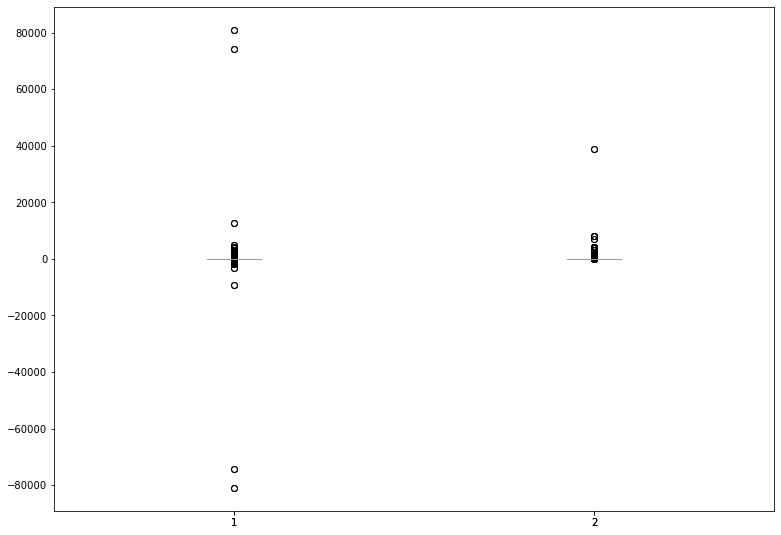

In [15]:
fig = plt.figure(figsize =(10, 7))
data = [df['Quantity'], df['UnitPrice']]
fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)
 

# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

AS we see from Standard Deviation and also the boxplot that there are lot of outliers in Quantity ordered and in Unit Price
Now for Desriptive Analysis. 

            Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.001243   -0.003457
UnitPrice  -0.001243   1.000000   -0.004524
CustomerID -0.003457  -0.004524    1.000000


<AxesSubplot:>

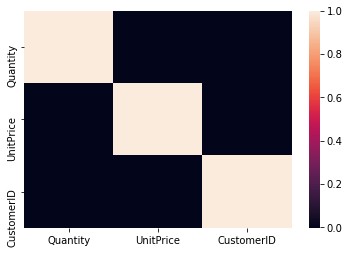

In [16]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [17]:
#Unique Countries
pd.DataFrame(df['Country'].unique())

,0
0,United Kingdom
1,Japan
2,Netherlands
3,EIRE
4,Spain
5,Germany
6,France
7,Sweden
8,Switzerland
9,Australia


In [18]:
#Unique Customers
UniqueCustomer = pd.DataFrame(df['CustomerID'].unique())
#Unique Customers are 4372 out 
UniqueCustomer

,0
0,16446.0
1,12346.0
2,15838.0
3,15749.0
4,16938.0
...,...
4367,16754.0
4368,15195.0
4369,15118.0
4370,13135.0


In [19]:
count = pd.DataFrame(df['CustomerID'])
x= pd.DataFrame(df['CustomerID'].value_counts())
x.rename({'CustomerID': 'Freq'}, axis='columns', inplace = True)
x

,Freq
17841.0,7812
14911.0,5898
14096.0,5128
12748.0,4459
14606.0,2759
...,...
17948.0,1
15590.0,1
16061.0,1
18174.0,1


In [20]:
# column Freq has value = 1
SBuyer = x[x.Freq == 1]
SBuyer
#Only 79 buyer purchased once

,Freq
16093.0,1
15524.0,1
13154.0,1
15562.0,1
16995.0,1
...,...
17948.0,1
15590.0,1
16061.0,1
18174.0,1


In [21]:
SBuyer['CustomerID']= SBuyer.index
SBuyer

<ipython-input-21-3f9936befc2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SBuyer['CustomerID']= SBuyer.index


,Freq,CustomerID
16093.0,1,16093.0
15524.0,1,15524.0
13154.0,1,13154.0
15562.0,1,15562.0
16995.0,1,16995.0
...,...,...
17948.0,1,17948.0
15590.0,1,15590.0
16061.0,1,16061.0
18174.0,1,18174.0


In [22]:
#Percentage of single purchaser is, 
len(SBuyer)/len(UniqueCustomer)*100

1.8069533394327537

In [23]:
x['CustomerID']= x.index
# get names of indexes for which
# column Freq has value = 1
index_names = x[ x['Freq'] <= 1 ].index
  
# drop these row indexes
# from dataFrame
x.drop(index_names, inplace = True)

In [24]:
#Repeat Customers are 4293
x

,Freq,CustomerID
17841.0,7812,17841.0
14911.0,5898,14911.0
14096.0,5128,14096.0
12748.0,4459,12748.0
14606.0,2759,14606.0
...,...,...
15423.0,2,15423.0
14642.0,2,14642.0
13130.0,2,13130.0
13298.0,2,13298.0


In [25]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
541903,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
541906,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom


In [26]:
#Corelation between One Time Sale and Returned Goods
#Now we are using .merge() with one unique key combination

# using .merge() function
df1 = pd.merge(df, SBuyer, how='inner', on=['CustomerID'])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq
0,C538110,21232,STRAWBERRY CERAMIC TRINKET BOX,-144,2010-12-09 15:24:00,1.06,17307.0,United Kingdom,1
1,C538100,84798A,PINK FOXGLOVE ARTIIFCIAL FLOWER,-12,2010-12-09 15:00:00,2.55,16579.0,United Kingdom,1
2,C538717,22457,NATURAL SLATE HEART CHALKBOARD,-12,2010-12-14 11:09:00,2.95,18141.0,United Kingdom,1
3,C539055,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,-12,2010-12-15 16:36:00,8.50,13829.0,United Kingdom,1
4,C539601,22768,FAMILY PHOTO FRAME CORNICE,-2,2010-12-20 13:58:00,9.95,14119.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
74,569420,15036,ASSORTED COLOURS SILK FAN,600,2011-10-04 10:33:00,0.72,16881.0,United Kingdom,1
75,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195.0,United Kingdom,1
76,561638,84568,GIRLS ALPHABET IRON ON PATCHES,1440,2011-07-28 14:54:00,0.17,15118.0,United Kingdom,1
77,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,1


            Quantity  UnitPrice  CustomerID  Freq
Quantity    1.000000  -0.048550   -0.201286   NaN
UnitPrice  -0.048550   1.000000    0.082662   NaN
CustomerID -0.201286   0.082662    1.000000   NaN
Freq             NaN        NaN         NaN   NaN


<AxesSubplot:>

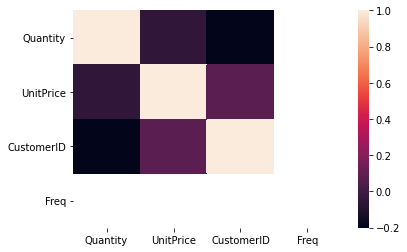

In [27]:
corr = df1.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [28]:
#Countries from where Buyers are from
pd.DataFrame(df['Country'].unique())

,0
0,United Kingdom
1,Japan
2,Netherlands
3,EIRE
4,Spain
5,Germany
6,France
7,Sweden
8,Switzerland
9,Australia


In [29]:
#Buyer And country 
c=pd.DataFrame(df.groupby('Country')['CustomerID'].nunique())
customercoutrywise=pd.DataFrame(c).sort_values(by='CustomerID', ascending=False)
customercoutrywise

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


In [30]:
df.Country.value_counts(normalize=True).head(10).mul(100).round(1).astype(str) + '%'

United Kingdom    88.8%
Germany            2.4%
France             2.1%
EIRE               1.9%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Name: Country, dtype: object

<AxesSubplot:xlabel='Country'>

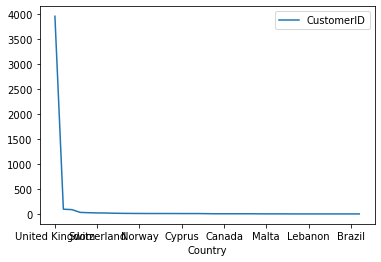

In [31]:
customercoutrywise.plot()
#UK is the major player from where Buyers are from, which is 89%

In [32]:
#Customer who pircahsed more than 1 items
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than one item.')

69.97% of customers ordered more than one item.


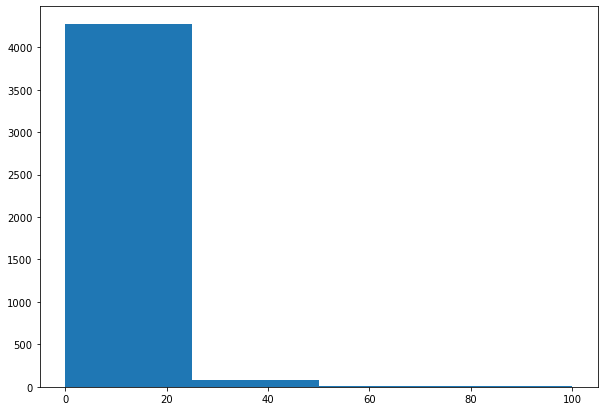

In [33]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(n_orders, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [34]:
# Check the oldest and latest date in the dataset.
print(f'Oldest date is - {df.InvoiceDate.min()}\n')
print(f'Latest date is - {df.InvoiceDate.max()}')

Oldest date is - 2010-12-01 08:26:00

Latest date is - 2011-12-09 12:50:00


In [35]:
#Monthly Sales 
# importing DateTime module to convert extracted dates
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
df.head()

<ipython-input-35-8d7c6a548b34>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-01
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010-12-01
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,2011-04-01
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,2011-04-01


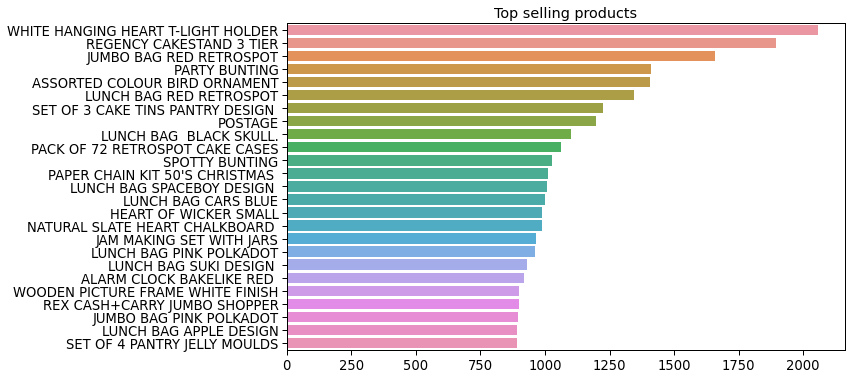

In [36]:
# Top selling products 
top_products = df['Description'].value_counts()[:25]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top selling products")
plt.show();

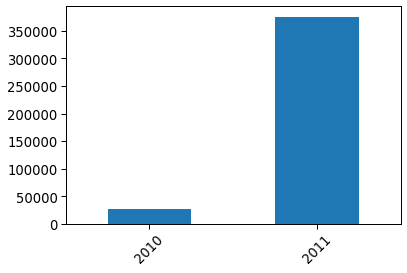

In [37]:
# Count of transactions in different years
df.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45);

Most of the records belong to 2011. Now doing monthly break up. And we see that max transaction is in Nov & Oct. Could be Black Friday or Halloween. Dec is lesser does not indicating advance buying, because in this data, sales till 09th is condidered. 


<AxesSubplot:>

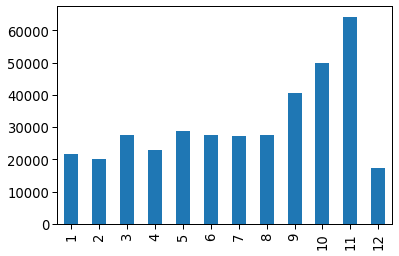

In [38]:
df[df.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar')

In [39]:
df['Total_cost'] = df['UnitPrice']*df['Quantity']
df

<ipython-input-39-630b9a1d7480>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_cost'] = df['UnitPrice']*df['Quantity']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Total_cost
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-01,-168469.6
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01,-77183.6
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010-12-01,-280.8
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,2011-04-01,-6539.4
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,2011-04-01,-3700.0
...,...,...,...,...,...,...,...,...,...,...
541903,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,2011-05-01,3096.0
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,2011-10-01,1008.0
541906,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011-11-01,0.0
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-01,77183.6


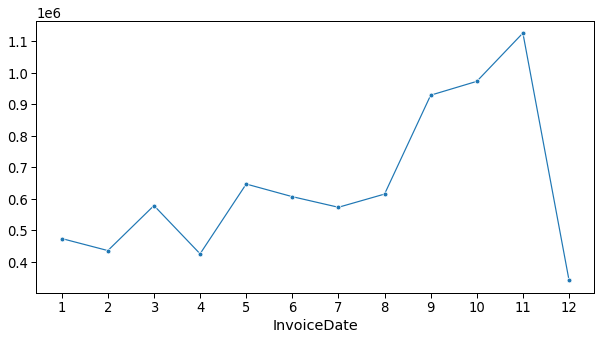

In [40]:
monthly_gross = df[df.InvoiceDate.dt.year==2011].groupby(df.InvoiceDate.dt.month).Total_cost.sum()
plt.figure(figsize=(10,5))
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o');
plt.xticks(range(1,13))
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


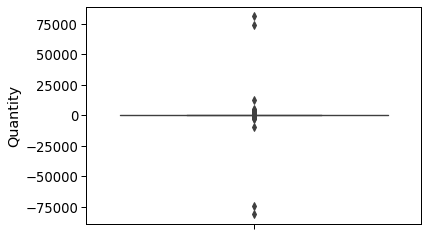

In [41]:
# Boxplot to for Quantity distribution
sns.boxplot(y='Quantity', data=df, orient='h');

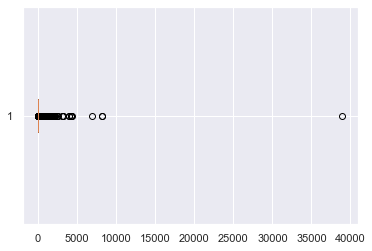

In [42]:
#Unit price distribution
sns.set(style="darkgrid")
plt.boxplot(df['UnitPrice'], vert = 0)
 
#plt.tight_layout()
plt.show()

#sns.boxplot(y='UnitPrice', data=df)

Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.
a. Create month cohorts and analyze active customers for each cohort.
b. Analyze the retention rate of customers.


Time cohorts
Time cohorts are customers who signed up for a product or service during a particular time frame. Analysing these cohorts shows the customers’ behaviour depending on the time they started using the company’s products or services. The time may be monthly or quarterly, even daily.

In [43]:
#Assigning Cohor to each group
group = df.groupby('CustomerID')['InvoiceMonth']
group.head()

0        2011-12-01
1        2011-01-01
4        2010-12-01
10       2011-04-01
20       2011-04-01
            ...    
541900   2011-07-01
541903   2011-05-01
541906   2011-11-01
541907   2011-01-01
541908   2011-12-01
Name: InvoiceMonth, Length: 21206, dtype: datetime64[ns]

In [44]:
df['Month'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df

<ipython-input-44-7bf596724d9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Total_cost,Month
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-01,-168469.6,2011-05-01
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01,-77183.6,2011-01-01
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010-12-01,-280.8,2010-12-01
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,2011-04-01,-6539.4,2011-01-01
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,2011-04-01,-3700.0,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...
541903,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,2011-05-01,3096.0,2011-05-01
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,2011-10-01,1008.0,2011-03-01
541906,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011-11-01,0.0,2011-11-01
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-01,77183.6,2011-01-01


In [45]:
#monthly cohorts based on the month each customer has made their first transaction.
def get_month(x):
    return dt.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = df.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceMonth value to the dataset
df['Month'] = grouping.transform('min')

<ipython-input-45-535ac4d3f548>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
<ipython-input-45-535ac4d3f548>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = grouping.transform('min')


Calculate time offset in months
Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

First, we will create some variables that capture the integer value of years and months for Invoice and Cohort Date

In [46]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(df,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(df,'Month')

# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
df['CohortIndex'] = years_diff * 12 + months_diff + 1

<ipython-input-46-5c78512d06d5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndex'] = years_diff * 12 + months_diff + 1


In [47]:
#Sanity Check to see if the Cohort Index is of different number
df['CohortIndex']

0         8
1         1
4         1
10        4
20        4
         ..
541903    1
541904    8
541906    1
541907    1
541908    8
Name: CohortIndex, Length: 401604, dtype: int64

In [48]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Total_cost,Month,CohortIndex
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-01,-168469.6,2011-05-01,8
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01,-77183.6,2011-01-01,1
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010-12-01,-280.8,2010-12-01,1
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,2011-04-01,-6539.4,2011-01-01,4
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,2011-04-01,-3700.0,2011-01-01,4


In [49]:
#retention rate or Active Customers
grouping = df.groupby(['Month', 'CohortIndex'])

In [50]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

In [51]:
# Create a pivot 
cohort_counts = cohort_data.pivot(index='Month', columns='CohortIndex', values='CustomerID')

In [52]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes

Month
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1, dtype: float64

In [54]:
# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

In [55]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Month,,,,,,,,,,,,,
2010-12-01,100.0,38.185654,33.438819,38.713080,35.970464,39.662447,37.974684,35.443038,35.443038,39.451477,37.341772,50.000000,27.42616
2011-01-01,100.0,23.990499,28.266033,24.228029,32.779097,29.928741,26.128266,25.653207,31.116390,34.679335,36.817102,14.964371,NaN
2011-02-01,100.0,24.736842,19.210526,27.894737,26.842105,24.736842,25.526316,28.157895,25.789474,31.315789,9.210526,NaN,NaN
2011-03-01,100.0,19.090909,25.454545,21.818182,23.181818,17.727273,26.363636,23.863636,28.863636,8.863636,NaN,NaN,NaN
2011-04-01,100.0,22.742475,22.073579,21.070234,20.735786,23.745819,23.076923,26.086957,8.361204,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.655914,17.204301,17.204301,21.505376,24.372760,26.523297,10.394265,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.851064,18.723404,27.234043,24.680851,33.617021,10.212766,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.942408,20.418848,23.036649,27.225131,11.518325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.149701,25.149701,25.149701,13.772455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
retention.min(), retention.max()

(CohortIndex
 1     100.000000
 2      13.395639
 3      13.068182
 4      12.080537
 5      13.772455
 6      11.518325
 7      10.212766
 8      10.394265
 9       8.361204
 10      8.863636
 11      9.210526
 12     14.964371
 13     27.426160
 dtype: float64,
 CohortIndex
 1     100.000000
 2      38.185654
 3      33.438819
 4      38.713080
 5      35.970464
 6      39.662447
 7      37.974684
 8      35.443038
 9      35.443038
 10     39.451477
 11     37.341772
 12     50.000000
 13     27.426160
 dtype: float64)

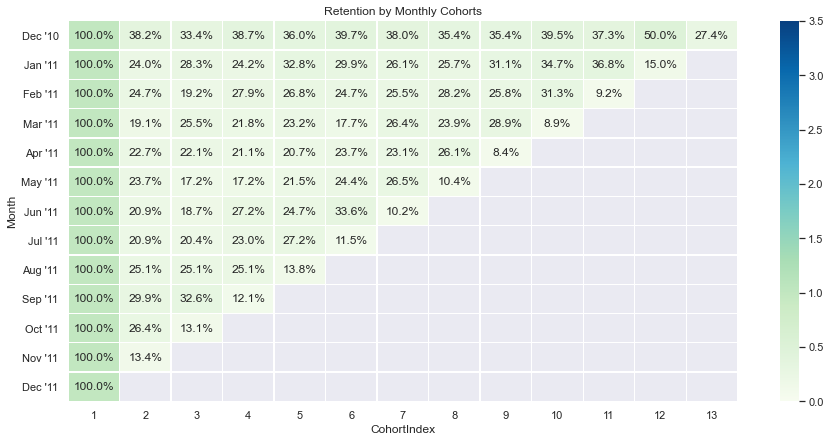

In [57]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

retention = retention/100
# Initialize inches plot figure
plt.figure(figsize=(15,7))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
            annot = True,
            #fmt= '.0%',
            cmap = "GnBu",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1%',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show();

In [58]:
#average price per cohort
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = df.groupby(['Month', 'CohortIndex']) 


# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='Month', columns='CohortIndex', values='UnitPrice')
average_price.round(1)
average_price.index = average_price.index.date

In [59]:
average_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
2010-12-01,3.216682,3.182040,3.207467,3.603758,2.937803,4.996508,3.184572,3.235695,3.511560,3.035982,3.309705,2.835557,2.759449
2011-01-01,3.505492,3.653572,3.069534,8.439024,3.157803,3.172919,2.918498,2.749649,2.641686,5.489040,2.886220,2.635897,NaN
2011-02-01,3.355968,4.469638,4.824106,3.150045,2.987616,2.792577,2.812985,3.214380,2.894988,2.946092,3.217742,NaN,NaN
2011-03-01,3.302802,4.990095,3.655094,3.289768,3.616562,2.758381,2.843273,2.809136,2.707846,2.466172,NaN,NaN,NaN
2011-04-01,3.431172,3.958074,3.300128,2.673439,3.028297,2.867185,2.902668,2.812492,2.636564,NaN,NaN,NaN,NaN
2011-05-01,4.662054,3.243691,2.652761,3.167391,2.667158,2.495751,2.615408,2.560400,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.490030,3.205283,3.343994,2.835952,2.553037,3.550657,2.293928,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.493676,3.480495,2.752121,2.701985,2.403989,2.366635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.028246,5.425904,5.714033,7.046410,6.830066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,3.235116,3.584834,2.957893,2.625593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


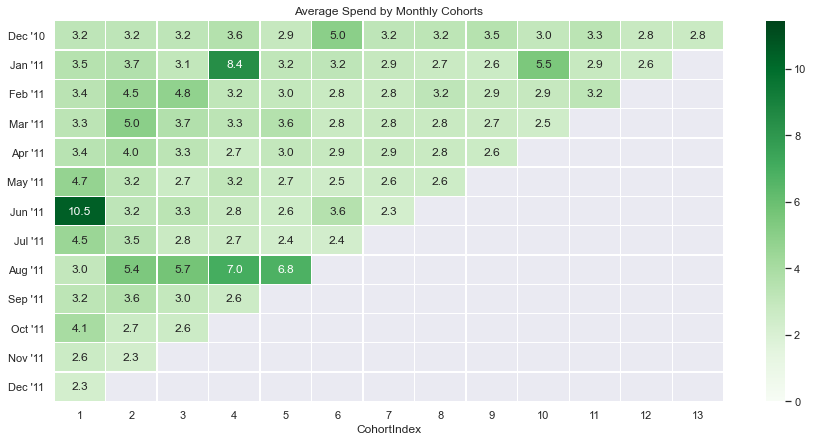

In [60]:
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_price,
            annot=True,
            vmin = 0.0,
#             vmax =20,
            cmap='Greens',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();

In [61]:
#average quantity per cohort

# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = df.groupby(['Month', 'CohortIndex']) 

# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='Month', columns='CohortIndex', values='Quantity')
average_quantity


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Month,,,,,,,,,,,,,
2010-12-01,11.200463,14.691852,15.108447,14.954097,13.054649,14.416287,15.306910,14.879447,16.764934,16.809158,17.528956,13.019471,14.901201
2011-01-01,10.127231,12.704190,12.429557,11.032382,12.288608,15.006101,14.302480,14.519414,11.451025,9.982762,9.256968,9.737305,NaN
2011-02-01,10.924450,12.251366,18.563808,12.018144,11.167271,11.476727,13.378526,12.448602,10.381961,12.043074,12.702765,NaN,NaN
2011-03-01,9.818050,9.972109,12.249296,9.483094,13.037510,12.369617,13.221102,12.263293,10.662973,9.091004,NaN,NaN,NaN
2011-04-01,9.803935,10.130252,9.432453,11.622102,11.645560,8.315994,9.777895,9.480778,7.403071,NaN,NaN,NaN,NaN
2011-05-01,10.977360,9.138087,14.023864,11.805435,10.973613,8.740725,10.275862,7.576774,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.411028,13.859783,10.509642,13.384102,10.360800,9.901184,9.348609,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.804225,12.700952,7.229385,7.929151,6.101961,7.111538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.941459,5.983114,5.371409,5.972992,6.980110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


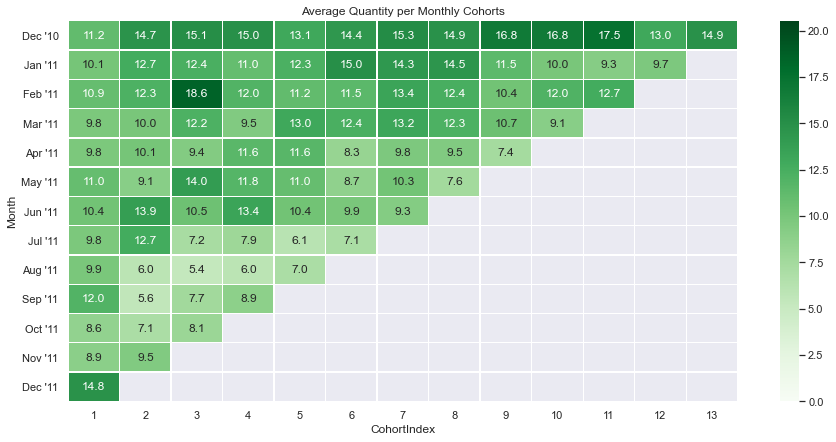

In [62]:
plt.figure(figsize=(15, 7))
plt.title('Average Quantity per Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='Greens',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();

Week 2
Data Modeling :
1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.
2. Calculate RFM metrics.
3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.
b1. Combine three ratings to get a RFM segment (as strings).
b2. Get the RFM score by adding up the three ratings.
b3. Analyze the RFM segments by summarizing them and comment on the findings.
Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.
Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

RFM Analysis
RFM analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Recency (R): Time since last purchase
Frequency (F): Total number of purchases
Monetary (M): Total purchase value

For RFM need to divide customers into four equal groups according to the distribution of values for recency, frequency, and monetary value. Four equal groups across three variables create 64 (4x4x4) different customer segments.

For example:
Customer with most recent purchase (R=4),
is Customer with most quantity (F=4),
Customer who spent the most (M=4)
This customer belongs to RFM segment 4-4-4 (Best Customers), (R=4, F=4, M=4)

In [63]:
#Creating a copy of df as safe copy. Will be using df1 for changes  

df1 = df
df1

#For recency, need to get the date difference since the last purchase. 
#For this using the last purchase date on the database as today's date

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Total_cost,Month,CohortIndex
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-01,-168469.6,2011-05-01,8
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01,-77183.6,2011-01-01,1
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010-12-01,-280.8,2010-12-01,1
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,2011-04-01,-6539.4,2011-01-01,4
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,2011-04-01,-3700.0,2011-01-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...
541903,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,2011-05-01,3096.0,2011-05-01,1
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,2011-10-01,1008.0,2011-03-01,8
541906,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011-11-01,0.0,2011-11-01,1
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-01,77183.6,2011-01-01,1


In [64]:
#last date available in our dataset
df1['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [65]:
current_date = df1['InvoiceDate'].max()
current_date = pd.to_datetime(current_date).date()
current_date

datetime.date(2011, 12, 9)

In [66]:
# Lets create a date column for date values only
df1['Purchase_Date'] = df1.InvoiceDate.dt.date

<ipython-input-66-3f5c8d7b2332>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Purchase_Date'] = df1.InvoiceDate.dt.date


In [67]:
recency = df1.groupby('CustomerID')['Purchase_Date'].max().reset_index()
# Creating a separate column for this date.
recency = recency.assign(Current_Date = current_date)
# Compute the number of days since last purchase
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)
recency

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346.0,2011-01-18,2011-12-09,325
1,12347.0,2011-12-07,2011-12-09,2
2,12348.0,2011-09-25,2011-12-09,75
3,12349.0,2011-11-21,2011-12-09,18
4,12350.0,2011-02-02,2011-12-09,310
...,...,...,...,...
4367,18280.0,2011-03-07,2011-12-09,277
4368,18281.0,2011-06-12,2011-12-09,180
4369,18282.0,2011-12-02,2011-12-09,7
4370,18283.0,2011-12-06,2011-12-09,3


In [68]:
# Drop Current tdate that we took for calculation. That is no more required
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)

#Now finiding out Frequency - how often or how many a customer used the product of a company. 

frequency = df1.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})
frequency

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


Doing the same on the Spending or Monetary
Monetary is the total amount of money a customer spent in that given period. Therefore big spenders will be differentiated with other customers such as MVP or VIP.

In [69]:
#We had already calculated Total Cost Earlier, using that

monetary = df1.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost':'Monetary'})
monetary 

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


In [70]:
#Also creating a seperate table for Customers for RFM. First merging frequency with recgency and then that table with monetary
temp_ = recency.merge(frequency, on='CustomerID')
rfm_table = temp_.merge(monetary, on='CustomerID')

In [71]:
rfm_table

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4367,18280.0,277,1,180.60
4368,18281.0,180,1,80.82
4369,18282.0,7,3,176.60
4370,18283.0,3,16,2045.53


In [72]:
#RFM Table integrity Check
# Fetch the records corresponding to the first customer id in above table
df1.groupby('CustomerID').Total_cost.sum()
#Data matches

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2045.53
18287.0    1837.28
Name: Total_cost, Length: 4372, dtype: float64

In [73]:
temp = df1.groupby('CustomerID').InvoiceDate.max().dt.date
temp = current_date - temp
temp
#Data Matches

CustomerID
12346.0   325 days
12347.0     2 days
12348.0    75 days
12349.0    18 days
12350.0   310 days
            ...   
18280.0   277 days
18281.0   180 days
18282.0     7 days
18283.0     3 days
18287.0    42 days
Name: InvoiceDate, Length: 4372, dtype: timedelta64[ns]

In [74]:
# RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75, 1])
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,13812.75,16.0,1.0,291.795
0.50,15300.50,50.0,3.0,644.070
0.75,16778.25,143.0,5.0,1608.335
1.00,18287.00,373.0,248.0,279489.020


In [75]:
#convert quartile information into a dictionary so that cutoffs can be picked up. Like a lookup table
quantiles=quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 13812.75, 0.5: 15300.5, 0.75: 16778.25, 1.0: 18287.0},
 'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0, 1.0: 373.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0, 1.0: 248.0},
 'Monetary': {0.25: 291.795,
  0.5: 644.0700000000002,
  0.75: 1608.335,
  1.0: 279489.0199999991}}

In [76]:
#RFM Segments
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quantiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [77]:
#rfm_table['segment'] = rfm_table.copy()
rfm_table['R_Quartile'] = rfm_table['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_table['F_Quartile'] = rfm_table['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_table['M_Quartile'] = rfm_table['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
rfm_table

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,12346.0,325,2,0.00,1,2,1
1,12347.0,2,7,4310.00,4,4,4
2,12348.0,75,4,1797.24,2,3,4
3,12349.0,18,1,1757.55,3,1,4
4,12350.0,310,1,334.40,1,1,2
...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,1,1
4368,18281.0,180,1,80.82,1,1,1
4369,18282.0,7,3,176.60,4,2,1
4370,18283.0,3,16,2045.53,4,4,4


In [78]:
rfm_table['RFMScore'] = rfm_table.R_Quartile.map(str) \
                            + rfm_table.F_Quartile.map(str) \
                            + rfm_table.M_Quartile.map(str)
rfm_table

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346.0,325,2,0.00,1,2,1,121
1,12347.0,2,7,4310.00,4,4,4,444
2,12348.0,75,4,1797.24,2,3,4,234
3,12349.0,18,1,1757.55,3,1,4,314
4,12350.0,310,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,1,1,111
4368,18281.0,180,1,80.82,1,1,1,111
4369,18282.0,7,3,176.60,4,2,1,421
4370,18283.0,3,16,2045.53,4,4,4,444


In [79]:
#Integrity Check - Passed
rfm_table.iloc[0,7] < rfm_table.iloc[1,7]

True

In [80]:
rfm_table['RFM_Score'] = rfm_table[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
#Assigning Score to the RFM before categorization. Will help later in plotting
rfm_table

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score
0,12346.0,325,2,0.00,1,2,1,121,4
1,12347.0,2,7,4310.00,4,4,4,444,12
2,12348.0,75,4,1797.24,2,3,4,234,9
3,12349.0,18,1,1757.55,3,1,4,314,8
4,12350.0,310,1,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,1,1,111,3
4368,18281.0,180,1,80.82,1,1,1,111,3
4369,18282.0,7,3,176.60,4,2,1,421,7
4370,18283.0,3,16,2045.53,4,4,4,444,12


In [81]:
# Create a dictionary for each segment to map them against each customer
segment_dict = {
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'Almost Lost':'244',         # Customer's shopping less often now who used to shop a lot
    'Lost Customers':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122', # Customer's shopped long ago but with less frequency and monetary value
    'No Harm to Lose Cheap Customers':'211' # Customer's shopped sometime back ago but with less frequency and monetary value
}

In [82]:
# Swap the key and value of dictionary. So that Lookup is from value to Customer type and not vie-versa
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))
rfm_table['Segment'] = rfm_table.RFMScore.map(lambda x: dict_segment.get(x))

In [83]:
rfm_table

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment
0,12346.0,325,2,0.00,1,2,1,121,4,None
1,12347.0,2,7,4310.00,4,4,4,444,12,Best Customers
2,12348.0,75,4,1797.24,2,3,4,234,9,None
3,12349.0,18,1,1757.55,3,1,4,314,8,None
4,12350.0,310,1,334.40,1,1,2,112,4,None
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,1,1,111,3,None
4368,18281.0,180,1,80.82,1,1,1,111,3,None
4369,18282.0,7,3,176.60,4,2,1,421,7,None
4370,18283.0,3,16,2045.53,4,4,4,444,12,Best Customers


In [84]:
rfm_table.groupby('Segment').CustomerID.count()

Segment
Almost Lost                         90
Best Customers                     482
Big Spenders                        55
Lost Cheap Customers               151
Lost Customers                      13
Loyal Customers                    225
No Harm to Lose Cheap Customers    177
Recent Customers                    99
Name: CustomerID, dtype: int64

Almost Lost                         90
Best Customers                     482  - These need Promotion materials and other engagement
Big Spenders                        55    These need exclusive product - high end newsletters 
Lost Cheap Customers               151    They may come back but focus spening is not recommended 
Lost Customers                      13    No effort to win them back
Loyal Customers                    225    They need focused product list and AI buil-in recommendation
No Harm to Lose Cheap Customers    177    Won't spend of this category
Recent Customers                    99    Need to keep their interest alive - promote newer things on their spending using product recommendation

<AxesSubplot:xlabel='Recency', ylabel='Count'>

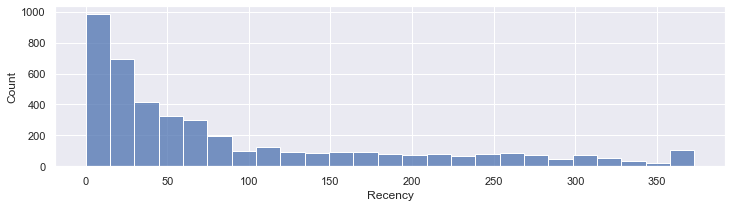

In [85]:
# Checking the distribution of variables.
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1); sns.histplot(rfm_table['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

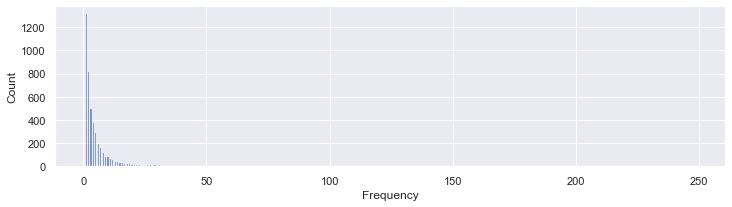

In [86]:
# Plot distribution of Frequency
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 2); sns.histplot(rfm_table['Frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

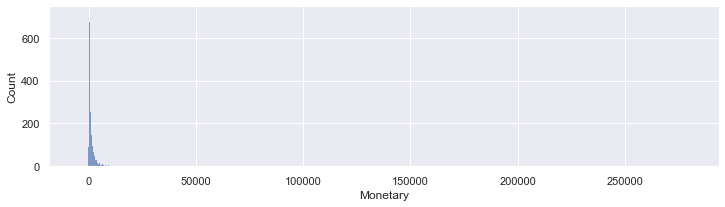

In [87]:
# Checking the distribution of variables.
plt.figure(figsize=(12,10))
# Plot distribution of Monetary
plt.subplot(3, 1, 3); sns.histplot(rfm_table['Monetary'])

<AxesSubplot:xlabel='RFM_Score', ylabel='Count'>

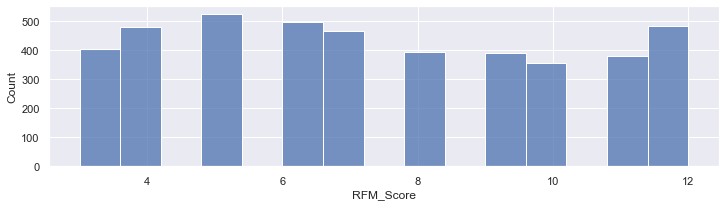

In [88]:
# Checking the distribution of variables.
plt.figure(figsize=(12,10))
# Plot distribution of RFM_Score Segment
plt.subplot(3, 1, 3); sns.histplot(rfm_table['RFM_Score'])

In [89]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   Recency     4372 non-null   int64  
 2   Frequency   4372 non-null   int64  
 3   Monetary    4372 non-null   float64
 4   R_Quartile  4372 non-null   int64  
 5   F_Quartile  4372 non-null   int64  
 6   M_Quartile  4372 non-null   int64  
 7   RFMScore    4372 non-null   object 
 8   RFM_Score   4372 non-null   int64  
 9   Segment     1292 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 375.7+ KB


In [90]:
rfm_table.describe()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.581199,5.075480,1893.531433,2.510979,2.349039,2.500000,7.360018
std,1722.390705,100.772139,9.338754,8218.696204,1.117084,1.151264,1.118162,2.872703
min,12346.000000,0.000000,1.000000,-4287.630000,1.000000,1.000000,1.000000,3.000000
25%,13812.750000,16.000000,1.000000,291.795000,2.000000,1.000000,1.750000,5.000000
50%,15300.500000,50.000000,3.000000,644.070000,3.000000,2.000000,2.500000,7.000000
75%,16778.250000,143.000000,5.000000,1608.335000,4.000000,3.000000,3.250000,10.000000
max,18287.000000,373.000000,248.000000,279489.020000,4.000000,4.000000,4.000000,12.000000


K-Means Clustering
From the above plots and rfm_table, we see that data is highly skewed.
It needs to be transformed and scale the data first because K-Means assumes that the variables should have a symmetric distributions(not skewed) and they should have same average values as well as same variance.

Also, noticed, -ve value in monetery. 
minimum range of value starts from 1 otherwise log transformation may lead to errors in graph plotting as well as K-Means clustering. After that we will utilize log transformation and scaling to make data available for for K-Means clustering.

The k-means algorithm is an unsupervised clustering algorithm. It takes a bunch of unlabeled points and tries to group them into “k” number of clusters.
It is unsupervised because the points have no external classification.

Step 0: Preparing the data; scaling and removal of -ve values
Step 1: Determine K value by Elbow method and specify the number of clusters K
Step 2: Randomly assign each data point to a cluster
Step 3: Determine the cluster centroid coordinates
Step 4: Determine the distances of each data point to the centroids and re-assign each point to the closest cluster centroid based upon minimum distance
Step 5: Calculate cluster centroids again
Step 6: Repeat steps 4 and 5 until we reach global optima where no improvements are possible and no switching of data points from one cluster to other.

In [91]:
# Create a copy of rfm table for scaled calculation
rfm_s = rfm_table.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_s.Monetary = rfm_s.Monetary + abs(rfm_s.Monetary.min()) + 1
rfm_s.Recency = rfm_s.Recency + abs(rfm_s.Recency.min()) + 1

# Check the summary of new values
rfm_s.describe()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.581199,5.075480,6182.161433,2.510979,2.349039,2.500000,7.360018
std,1722.390705,100.772139,9.338754,8218.696204,1.117084,1.151264,1.118162,2.872703
min,12346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,13812.750000,17.000000,1.000000,4580.425000,2.000000,1.000000,1.750000,5.000000
50%,15300.500000,51.000000,3.000000,4932.700000,3.000000,2.000000,2.500000,7.000000
75%,16778.250000,144.000000,5.000000,5896.965000,4.000000,3.000000,3.250000,10.000000
max,18287.000000,374.000000,248.000000,283777.650000,4.000000,4.000000,4.000000,12.000000


In [92]:
rfm_s.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment
0,12346.0,326,2,4288.63,1,2,1,121,4,None
1,12347.0,3,7,8598.63,4,4,4,444,12,Best Customers
2,12348.0,76,4,6085.87,2,3,4,234,9,None
3,12349.0,19,1,6046.18,3,1,4,314,8,None
4,12350.0,311,1,4623.03,1,1,2,112,4,None


Since it is unsupervised learning, we do not need to define the the Segment & RFM_Score. We need the raw 3 components to find the clusters. Later we would add it in main table to see which cluster the cusomer belongs to. 

Seperating the three main inputs for K-CLustering and scale it

In [93]:
raw_data = rfm_s[['Recency','Frequency','Monetary']]
data_log = np.log(raw_data)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)

# Create a pandas DataFrame
data_norm = pd.DataFrame(data=data_log, index=raw_data.index, columns=raw_data.columns)

data_norm.head()

,Recency,Frequency,Monetary
0,5.786897,0.693147,8.363723
1,1.098612,1.945910,9.059358
2,4.330733,1.386294,8.713725
3,2.944439,0.000000,8.707182
4,5.739793,0.000000,8.438806


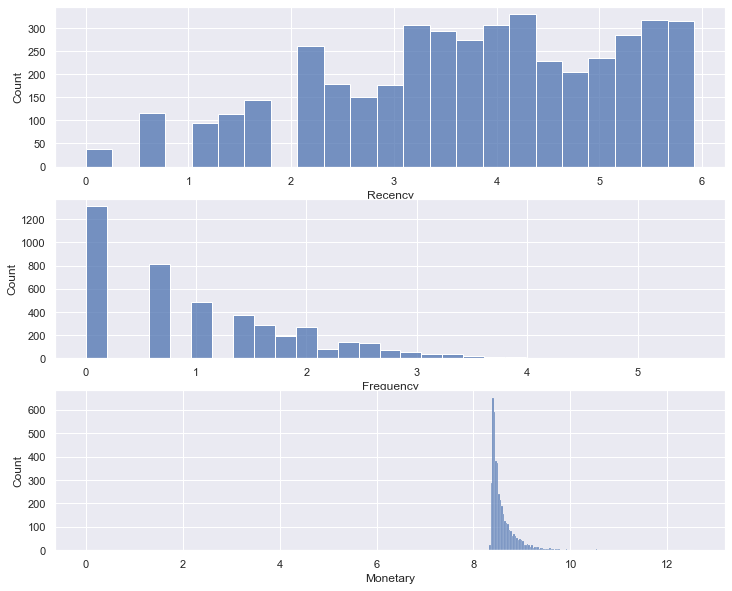

In [94]:
#Plotting the figures again to see if it is normalized

plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.histplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.histplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.histplot(data_norm['Monetary'])

# Show the plot
plt.show()

Finding out the optimum value of the clusters using elbow method and using the feature in Kmean called inertia_

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

In Figure below the slowdown occurs at 5 but sharp cut starts at 3. So, we take 5 or 3 as the number of cluster = k = 5

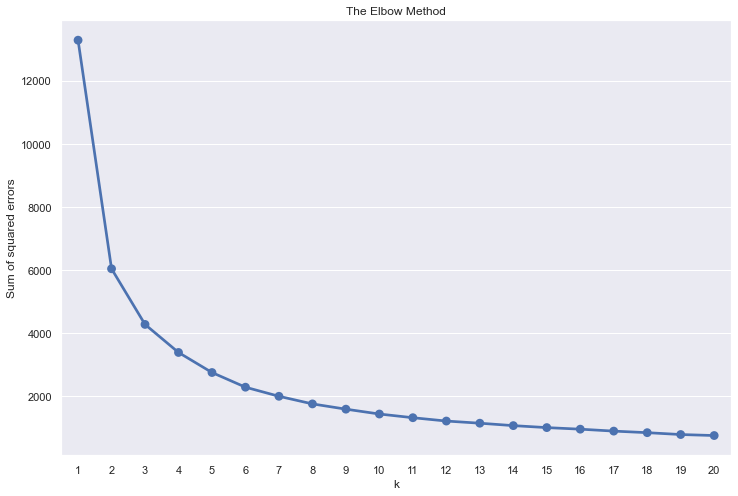

In [137]:
sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(12,8))

plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Silhouette score for number of cluster(s) 2: 0.46320292333881263
Silhouette score for number of cluster(s) 3: 0.37882385562792953
Silhouette score for number of cluster(s) 4: 0.38942882326747985
Silhouette score for number of cluster(s) 5: 0.38480602348390036
Silhouette score for number of cluster(s) 6: 0.3814620438903689
Silhouette score for number of cluster(s) 7: 0.37740088768033014
Silhouette score for number of cluster(s) 8: 0.3749214782348163
Silhouette score for number of cluster(s) 9: 0.379746242901208
Silhouette score for number of cluster(s) 10: 0.37572690058058267
Silhouette score for number of cluster(s) 11: 0.3869596058631919


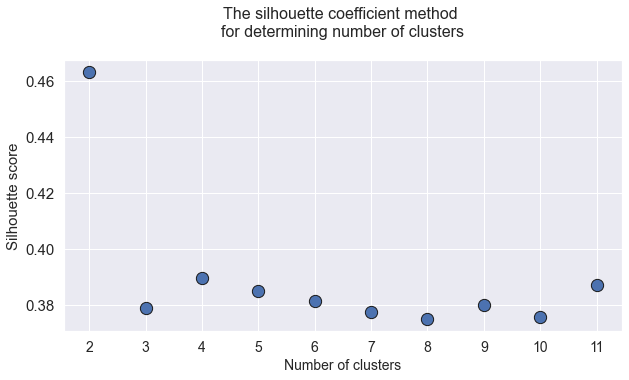

In [140]:
#Confirming as the same
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(data_norm)
    preds = km.predict(data_norm)    
    silhouette = silhouette_score(data_norm,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          5-
plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

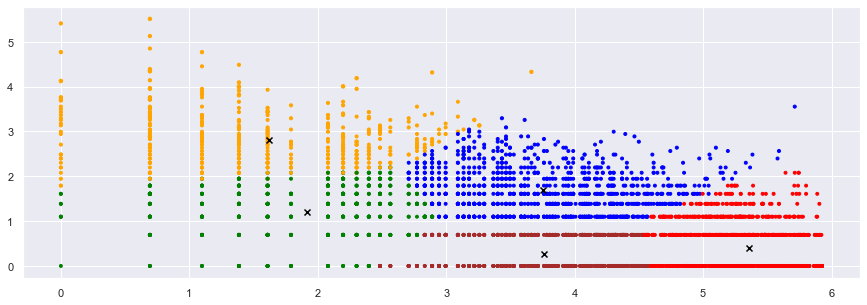

In [141]:
#Implementation of K-Means Clustering

plt.figure(figsize=(15,5))

model = KMeans(n_clusters = 5)
model.fit(data_norm)

#Extract cluster labels from labels_ attribute
cluster_labels = model.labels_
centers = np.array(model.cluster_centers_)

plt.plot()
 

colormap = np.array(['Red', 'Blue', 'Green', 'Orange', 'Brown', 'Black'])
z = plt.scatter(data_norm.Recency, data_norm.Frequency, data_norm.Monetary,  c = colormap[cluster_labels])
plt.scatter(centers[:,0], centers[:,1], marker="x", color='Black')


In [100]:
# Create a cluster label column in the original DataFrame
data_norm_k5 = data_norm.assign(Cluster = model.labels_)
data_k5 = raw_data.assign(Cluster = model.labels_)

# Calculate average RFM values and size for each cluster
summary_k5 = data_k5.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

summary_k5

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         229.0       2.0   4743.0  1279
1           9.0       4.0   5404.0   646
2          51.0       1.0   4751.0   873
3          53.0       6.0   6197.0  1120
4           7.0      21.0  14061.0   454

In [101]:
data_norm_k5.index = rfm_s['CustomerID'].astype(int)
data_norm_k5

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,5.786897,0.693147,8.363723,0
12347,1.098612,1.945910,9.059358,4
12348,4.330733,1.386294,8.713725,3
12349,2.944439,0.000000,8.707182,2
12350,5.739793,0.000000,8.438806,0
...,...,...,...,...
18280,5.627621,0.000000,8.404971,0
18281,5.198497,0.000000,8.382392,0
18282,2.079442,1.098612,8.404076,1


In [102]:
# Assign the clusters as column to each customer

Cluster_table = rfm_s.assign(Cluster = cluster_labels)
Cluster_table

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment,Cluster
0,12346.0,326,2,4288.63,1,2,1,121,4,None,0
1,12347.0,3,7,8598.63,4,4,4,444,12,Best Customers,4
2,12348.0,76,4,6085.87,2,3,4,234,9,None,3
3,12349.0,19,1,6046.18,3,1,4,314,8,None,2
4,12350.0,311,1,4623.03,1,1,2,112,4,None,0
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,4469.23,1,1,1,111,3,None,0
4368,18281.0,181,1,4369.45,1,1,1,111,3,None,0
4369,18282.0,8,3,4465.23,4,2,1,421,7,None,1
4370,18283.0,4,16,6334.16,4,4,4,444,12,Best Customers,4


In [103]:
# Check counts of records assigned to different clusters
Cluster_table.Cluster.value_counts()

0    1279
3    1120
2     873
1     646
4     454
Name: Cluster, dtype: int64

In [104]:
#Cluster_table
Inference = Cluster_table.groupby(['Cluster']).agg({'RFM_Score': 'mean'}).round(0)
Inference
#summary_k5 = data_k5.groupby(['Cluster'])

,RFM_Score
Cluster,
0,4.0
1,9.0
2,6.0
3,9.0
4,12.0


In [105]:
Cluster_table[Cluster_table.Cluster == 0].sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment,Cluster
4081,17890.0,323,2,4875.52,1,2,2,122,5,Lost Cheap Customers,0
2016,15083.0,257,1,4376.83,1,1,1,111,3,None,0
3223,16714.0,219,4,5167.69,1,3,3,133,7,None,0
1826,14816.0,198,1,4560.48,1,1,1,111,3,None,0
2550,15789.0,359,1,4639.93,1,1,2,112,4,None,0
2765,16093.0,107,1,4305.63,2,1,1,211,4,No Harm to Lose Cheap Customers,0
242,12641.0,116,1,4474.53,2,1,1,211,4,No Harm to Lose Cheap Customers,0
758,13343.0,173,2,4592.56,1,2,2,122,5,Lost Cheap Customers,0
841,13466.0,101,2,4586.58,2,2,2,222,6,None,0
3798,17508.0,281,1,4675.94,1,1,2,112,4,None,0


In [106]:
Cluster_table[Cluster_table.Cluster == 1].sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment,Cluster
520,13017.0,8,1,4492.63,4,1,1,411,6,None,1
3890,17631.0,2,3,4816.96,4,2,2,422,8,None,1
3885,17624.0,15,2,5132.11,4,2,3,423,9,None,1
232,12627.0,11,7,8767.16,4,4,4,444,12,Best Customers,1
4280,18167.0,4,6,5644.14,4,4,3,443,11,Recent Customers,1
566,13083.0,5,2,4592.38,4,2,2,422,8,None,1
3931,17682.0,11,7,6747.96,4,4,4,444,12,Best Customers,1
1471,14335.0,17,2,4743.49,4,2,2,422,8,None,1
1346,14157.0,20,3,4681.07,3,2,2,322,7,None,1
247,12646.0,5,2,5635.60,4,2,3,423,9,None,1


In [107]:
Cluster_table[Cluster_table.Cluster == 2].sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment,Cluster
570,13091.0,22,2,4608.45,3,2,2,322,7,None,2
4188,18040.0,20,2,4645.83,3,2,2,322,7,None,2
1602,14508.0,23,2,4556.68,3,2,1,321,6,None,2
1202,13960.0,22,2,4518.85,3,2,1,321,6,None,2
1249,14029.0,64,2,4756.29,2,2,2,222,6,None,2
1404,14236.0,81,2,4779.49,2,2,2,222,6,None,2
2381,15565.0,51,2,4461.79,3,2,1,321,6,None,2
58,12420.0,64,1,4889.02,2,1,2,212,5,None,2
3446,17011.0,31,1,4559.53,3,1,1,311,5,None,2
3349,16878.0,25,2,4288.63,3,2,1,321,6,None,2


In [108]:
Cluster_table[Cluster_table.Cluster == 3].sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment,Cluster
3556,17166.0,39,3,4478.12,3,2,1,321,6,None,3
1430,14273.0,52,4,4848.60,2,3,2,232,7,None,3
3147,16609.0,16,9,9739.59,4,4,4,444,12,Best Customers,3
2310,15468.0,36,5,4727.09,3,3,2,332,8,None,3
1477,14342.0,22,6,4896.34,3,4,2,342,9,None,3
1338,14147.0,50,3,4757.03,3,2,2,322,7,None,3
3246,16743.0,30,8,6455.51,3,4,4,344,11,Loyal Customers,3
3769,17462.0,52,3,4951.57,2,2,3,223,7,None,3
4208,18069.0,27,7,6283.02,3,4,4,344,11,Loyal Customers,3
1336,14145.0,47,5,7436.83,3,3,4,334,10,Big Spenders,3


In [109]:
Cluster_table[Cluster_table.Cluster == 4].sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment,Cluster
2590,15838.0,12,21,37639.39,4,4,4,444,12,Best Customers,4
3215,16705.0,1,29,18234.76,4,4,4,444,12,Best Customers,4
3923,17673.0,2,7,5876.70,4,4,3,443,11,Recent Customers,4
3985,17754.0,1,6,5920.94,4,4,4,444,12,Best Customers,4
4340,18241.0,10,18,6346.72,4,4,4,444,12,Best Customers,4
3537,17139.0,16,15,14856.50,4,4,4,444,12,Best Customers,4
3014,16422.0,18,75,38094.32,3,4,4,344,11,Loyal Customers,4
115,12490.0,6,10,9706.56,4,4,4,444,12,Best Customers,4
277,12682.0,4,31,16568.45,4,4,4,444,12,Best Customers,4
4192,18044.0,5,11,6374.28,4,4,4,444,12,Best Customers,4


CLuster 0 & 4 does not matter for us. Their RFM Score avg is low, and as we see they do not fall under any specialized marketing plan. They are the ones, who have very low RF&M. Though their number is high. They may be chaced customer who happen to drop in by some add etc. 

1 & 3 has few categories that we had defined. Still a lot of effort is not to be directed on this cluster. Normal exposure to brand is good enough. 

2 is the category we should be foucsing out attention to. Their RFM avg is 12

Snake plots
Market research technique to compare different segments
Visual representation of each segment's attributes
Plot each cluster's average normalized values of each attribute
To plot this we should have normalized data distribution and all the attributes in a single column. We will use pandas melt facility to achieve that

In [110]:
#Melt the data into along format so RFM values and metric names are stored in 1 column each
data_melt = pd.melt(data_norm_k5.reset_index(),
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'],
                    var_name='Attribute',
                    value_name='Value')
data_melt


,CustomerID,Cluster,Attribute,Value
0,12346,0,Recency,5.786897
1,12347,4,Recency,1.098612
2,12348,3,Recency,4.330733
3,12349,2,Recency,2.944439
4,12350,0,Recency,5.739793
...,...,...,...,...
13111,18280,0,Monetary,8.404971
13112,18281,0,Monetary,8.382392
13113,18282,1,Monetary,8.404076
13114,18283,4,Monetary,8.753712


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

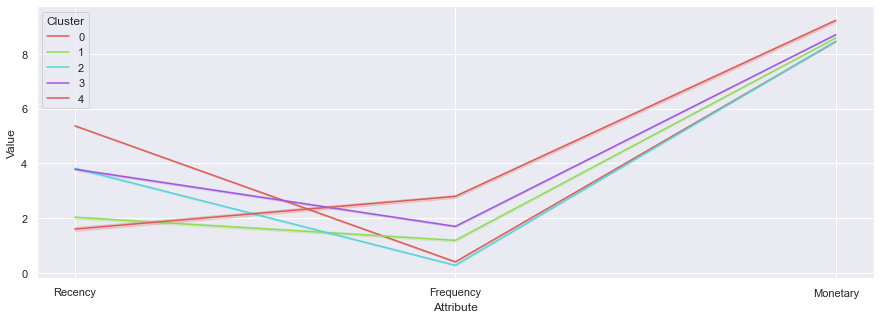

In [111]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Attribute", y="Value", hue='Cluster', palette = 'hls', data=data_melt)

0, 1, 2, & 3 show similar spending. 
4 & 3 have are very infrequent. 0 shows average frequency of vist, - These are low spending but have a good volume of transaction. 0 cannot be ignores, thought a lot of effort or resources may not be given. 
but hightest is 2, followed by 1 - they are good spender with good frequency. We would need to make sure we retain them. 

Surprizingly 2 shows low recency. So these are planned buyers, not impulsive ones, whole 0 are the impulsive ones. 

Now we get cluster average and population av erage to see the relative importance of each cluster
Then plot it in heat map

In [112]:
cluster_avg = data_k5.groupby(['Cluster']).mean()
population_avg = raw_data.head().mean()

In [113]:
population_avg

Recency       147.000
Frequency       3.000
Monetary     5928.468
dtype: float64

In [114]:
cluster_avg

,Recency,Frequency,Monetary
Cluster,,,
0,228.553557,1.718530,4742.588234
1,9.105263,3.773994,5404.087043
2,50.983963,1.395189,4750.991639
3,52.691071,6.180357,6196.646055
4,6.696035,20.735683,14061.101145


In [115]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,0.55,-0.43,-0.20
1,-0.94,0.26,-0.09
2,-0.65,-0.53,-0.20
3,-0.64,1.06,0.05
4,-0.95,5.91,1.37


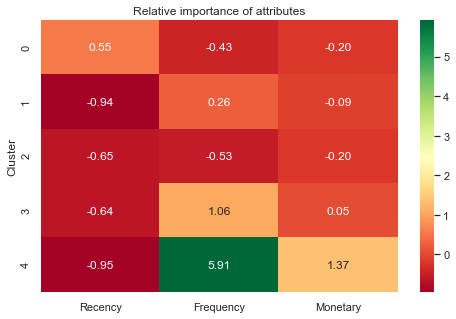

In [119]:
# Plot heatmap
plt.figure(figsize=(8, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

#Heat map confirms the findings. 
Now Reporting
Instead of taking to Tableau and merging the data set, creating one excel file here with all the data points required. 
This file will be used in Tableau for Visulalization

In [116]:
Cluster_table

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment,Cluster
0,12346.0,326,2,4288.63,1,2,1,121,4,None,0
1,12347.0,3,7,8598.63,4,4,4,444,12,Best Customers,4
2,12348.0,76,4,6085.87,2,3,4,234,9,None,3
3,12349.0,19,1,6046.18,3,1,4,314,8,None,2
4,12350.0,311,1,4623.03,1,1,2,112,4,None,0
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,4469.23,1,1,1,111,3,None,0
4368,18281.0,181,1,4369.45,1,1,1,111,3,None,0
4369,18282.0,8,3,4465.23,4,2,1,421,7,None,1
4370,18283.0,4,16,6334.16,4,4,4,444,12,Best Customers,4


In [120]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Total_cost,Month,CohortIndex,Purchase_Date
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-01,-168469.6,2011-05-01,8,2011-12-09
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01,-77183.6,2011-01-01,1,2011-01-18
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010-12-01,-280.8,2010-12-01,1,2010-12-02
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,2011-04-01,-6539.4,2011-01-01,4,2011-04-18
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,2011-04-01,-3700.0,2011-01-01,4,2011-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541903,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,2011-05-01,3096.0,2011-05-01,1,2011-05-27
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,2011-10-01,1008.0,2011-03-01,8,2011-10-27
541906,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011-11-01,0.0,2011-11-01,1,2011-11-25
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-01,77183.6,2011-01-01,1,2011-01-18


In [121]:
FinalFile = pd.merge(df1, Cluster_table, how = 'left', on='CustomerID')

In [122]:
FinalFile

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Total_cost,...,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment,Cluster
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-01,-168469.6,...,1,3,4291.53,4,2,1,421,7,None,1
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01,-77183.6,...,326,2,4288.63,1,2,1,121,4,None,0
2,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010-12-01,-280.8,...,12,21,37639.39,4,4,4,444,12,Best Customers,4
3,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,2011-04-01,-6539.4,...,236,4,25824.53,1,3,4,134,8,None,0
4,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,2011-04-01,-3700.0,...,236,4,25824.53,1,3,4,134,8,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401599,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,2011-05-01,3096.0,...,197,1,7384.63,1,1,4,114,6,None,0
401600,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,2011-10-01,1008.0,...,9,36,20581.73,4,4,4,444,12,Best Customers,4
401601,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011-11-01,0.0,...,15,1,4288.63,4,1,1,411,6,None,2
401602,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-01,77183.6,...,326,2,4288.63,1,2,1,121,4,None,0


In [128]:
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,0.55,-0.43,-0.20
1,-0.94,0.26,-0.09
2,-0.65,-0.53,-0.20
3,-0.64,1.06,0.05
4,-0.95,5.91,1.37


In [129]:
FF = pd.merge(FinalFile, relative_imp, how = 'left', on='Cluster')

In [130]:
FF

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Total_cost,...,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment,Cluster,Recency_y,Frequency_y,Monetary_y
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-01,-168469.6,...,4,2,1,421,7,None,1,-0.938059,0.257998,-0.088451
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01,-77183.6,...,1,2,1,121,4,None,0,0.554786,-0.427157,-0.200031
2,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010-12-01,-280.8,...,4,4,4,444,12,Best Customers,4,-0.954449,5.911894,1.371793
3,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,2011-04-01,-6539.4,...,1,3,4,134,8,None,0,0.554786,-0.427157,-0.200031
4,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,2011-04-01,-3700.0,...,1,3,4,134,8,None,0,0.554786,-0.427157,-0.200031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401599,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,2011-05-01,3096.0,...,1,1,4,114,6,None,0,0.554786,-0.427157,-0.200031
401600,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,2011-10-01,1008.0,...,4,4,4,444,12,Best Customers,4,-0.954449,5.911894,1.371793
401601,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011-11-01,0.0,...,4,1,1,411,6,None,2,-0.653170,-0.534937,-0.198614
401602,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-01,77183.6,...,1,2,1,121,4,None,0,0.554786,-0.427157,-0.200031


In [131]:
FF.rename(columns = {'Recency_y':'Recency_Imp'}, inplace = True)
FF.rename(columns = {'Frequency_y':'Frequency_Imp'}, inplace = True)
FF.rename(columns = {'Monetary_y':'Monetary_Imp'}, inplace = True)
FF

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Total_cost,...,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,Segment,Cluster,Recency_Imp,Frequency_Imp,Monetary_Imp
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-01,-168469.6,...,4,2,1,421,7,None,1,-0.938059,0.257998,-0.088451
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01,-77183.6,...,1,2,1,121,4,None,0,0.554786,-0.427157,-0.200031
2,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,2010-12-01,-280.8,...,4,4,4,444,12,Best Customers,4,-0.954449,5.911894,1.371793
3,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,2011-04-01,-6539.4,...,1,3,4,134,8,None,0,0.554786,-0.427157,-0.200031
4,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,2011-04-01,-3700.0,...,1,3,4,134,8,None,0,0.554786,-0.427157,-0.200031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401599,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,2011-05-01,3096.0,...,1,1,4,114,6,None,0,0.554786,-0.427157,-0.200031
401600,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,2011-10-01,1008.0,...,4,4,4,444,12,Best Customers,4,-0.954449,5.911894,1.371793
401601,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011-11-01,0.0,...,4,1,1,411,6,None,2,-0.653170,-0.534937,-0.198614
401602,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-01,77183.6,...,1,2,1,121,4,None,0,0.554786,-0.427157,-0.200031


In [222]:
i= 0
wcss_silhouette
sse = pd.DataFrame(wcss_silhouette)
sse

,0
0,0.463203
1,0.378824
2,0.389429
3,0.384806
4,0.381462
5,0.377401
6,0.374921
7,0.379746
8,0.375727
9,0.386960


In [223]:
sse.to_excel(r'D:\OneDrive\Studies\AI - ML\Capstone Project\SSE.xlsx')

In [132]:
FF.to_excel('Cluster_file.xlsx')

SSE file is to create the SSE in Tableau. These two Tables are picked added as source in Tableau as independent tables. 
The last part is in Tableau Public.
Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
a. Country-wise analysis to demonstrate average spend. - Use a bar chart to show the monthly figures
b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold
c. Bar graph to show the count of orders vs. hours throughout the day
d. Plot the distribution of RFM values using histogram and frequency charts
e. Plot error (cost) vs. number of clusters selected
f. Visualize to compare the RFM values of the clusters using heatmap

Link to Tabelau DAshboard is https://public.tableau.com/app/profile/naseha/viz/CapstoneProject3v1_0-SimpiliLearnOnlineRetail/Country-wiseMonthwiseDetailedDashboard 
